## Preprocessing

The dataset includes audio files (wav, mp3, etc) of male and female orgasm.

This notebook is for preprocessing, feature engineering etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('seaborn-poster')
    
import scipy as sp
from scipy import signal
from scipy.io.wavfile import read
import sys
import os

import soundfile as sf

In [34]:
import librosa
import librosa.display

In [2]:
path = '../../../Downloads/dataset/'
files = os.listdir(path)

In [3]:
wavfiles = []

for file in files:
    if file[-3:]=='wav':
        wavfiles.append(file)
    

In [4]:
wavfiles[0]

'FEET LOVE.wav'

In [5]:
path+wavfiles[0]

'../../../Downloads/dataset/FEET LOVE.wav'

In [6]:
testfile=path+wavfiles[2]
def dataext(file):
    
    data = sf.read(file)
    fs = data[1]
    audio = data[0]#[:50000]
    audio = np.transpose(audio)*100
    # audio[np.where(audio < 1)] = 1
    # audio = 10 * np.log10(audio)
    if len(audio) == 2:
        amp = [np.max(audio[0]), np.max(audio[1]) ]
        time = np.arange( len(audio[0]) ) / float(fs)
    elif len(audio) == 1 or len(audio) > 100:
        amp = np.max(audio)
        time = np.arange( len(audio) ) / float(fs)
    elif len(audio) == 3:
        amp = [np.max(audio[0]), np.max(audio[1]), np.max(audio[2]) ]
        time = np.arange( len(audio[0]) ) / float(fs)
    elif len(audio) == 4:
        amp = [np.max(audio[0]), np.max(audio[1]), np.max(audio[2]), np.max(audio[2]) ]
        time = np.arange( len(audio[0]) ) / float(fs)

        
    return [amp, time, fs, audio ]

In [7]:
dataext(testfile)

[[80.0048828125, 80.0048828125],
 array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
        4.49537642e+01, 4.49537868e+01, 4.49538095e+01]),
 44100,
 array([[ 0.        ,  0.        ,  0.        , ..., -0.00915527,
         -0.00915527, -0.00915527],
        [ 0.        ,  0.        ,  0.        , ..., -0.00915527,
         -0.00915527, -0.00915527]])]

## Feature Extraction

ZCR

In [25]:
testfiledata = dataext(testfile)

zcr = librosa.feature.zero_crossing_rate( testfiledata[-1][0] )

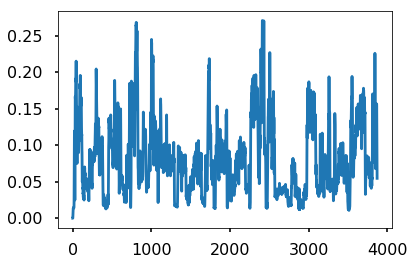

In [28]:
plt.plot( zcr[0] )
plt.show()

Mel scale spectrogram

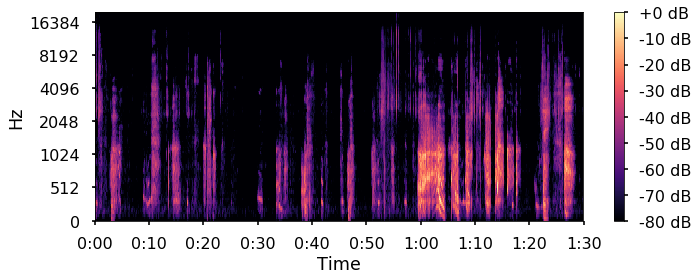

In [37]:
# D = np.abs(librosa.stft( testfiledata[-1][0]))**2
# S = librosa.feature.melspectrogram(S=D)

S = librosa.feature.melspectrogram(y=testfiledata[-1][0], sr=testfiledata[-2], n_mels=128, fmax=20000)

plt.figure( figsize=(10,4) )

librosa.display.specshow( librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax= 20000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

## Visualization

Read in data

In [42]:
wavaudioset = [ dataext(path+wf) for wf in wavfiles]

Define a visualization function

In [8]:
def vis(audiodata):
    
    amp = audiodata[0]
    time = audiodata[1]
    fs = audiodata[2]
    audio = audiodata[3]
    
    f, axarr = plt.subplots(2, sharex=True,figsize=(15,15))
#     f.suptitle('Sharing X axis')

    if len(audio) == 2:
        axarr[0].plot(time, audio[0],'r-',label="left")
        axarr[0].plot(time, audio[1],'k--',label='right')
        axarr[0].set(ylabel="Amplitude")
    #     axarr[0].xlabel("Time (s)")
        axarr[0].set(title="Waveform of Orgasm")
        axarr[0].legend()


        # fact= 20
        # audiolen = len(audio[0])
        # winlen = audiolen/fact
        winlen=512
        # norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max()),
        #                    cmap='PuBu_r'
        f, t, Zxx = signal.stft(audio[0], fs, nperseg=winlen)
        axarr[1].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp[0], cmap='hot')
        # plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=ampl, norm=colors.LogNorm(vmin=0.01,vmax=10), cmap='hot')
        axarr[1].set(title='Orgasm STFT Magnitude')
        axarr[1].set(ylabel='Frequency [Hz]')
        axarr[1].set(xlabel='Time [sec]')
        axarr[1].set(ylim=[0,2000])
        # plt.xlim([0,2.5])
        
    #########
    ##!!!!!!! Have to write the code to plot monochannel data


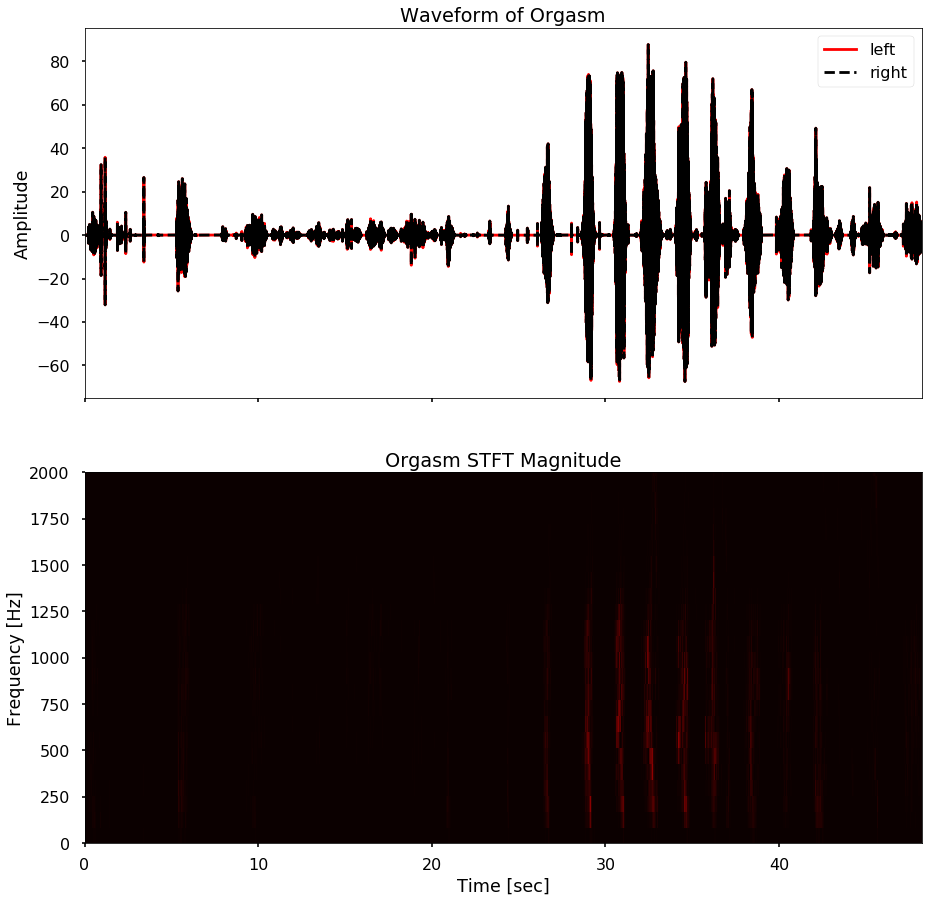

In [10]:
## Test the functions
vis(wavaudioset[0])

In [47]:
def vismel(audiodata):
    
    amp = audiodata[0]
    time = audiodata[1]
    fs = audiodata[2]
    audio = audiodata[3]


    if len(audio) == 2:


        winlen=512

        S = librosa.feature.melspectrogram(y=audio[0], sr=fs, n_mels=128, fmax=20000)

        plt.figure( figsize=(15,4) )

        librosa.display.specshow( librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax= 20000, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Orgasm MELSPECTROGRAM')
        plt.tight_layout()
        
    #########
    ##!!!!!!! Have to write the code to plot monochannel data


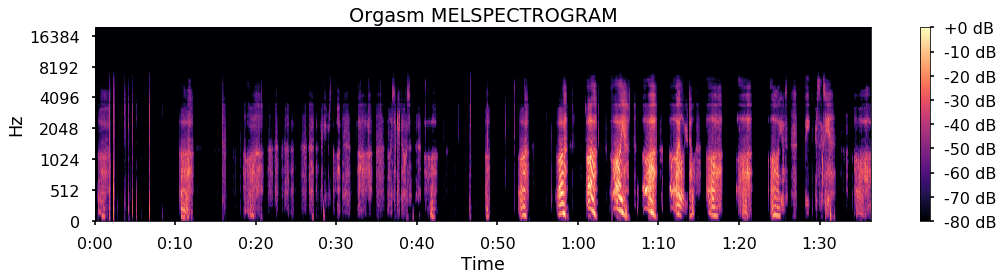

In [48]:
vismel(wavaudioset[0])

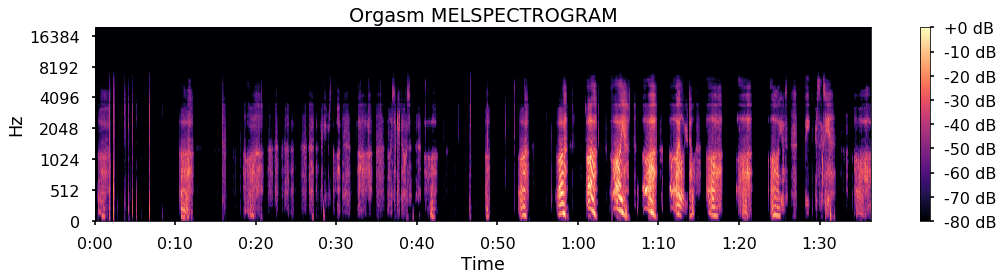

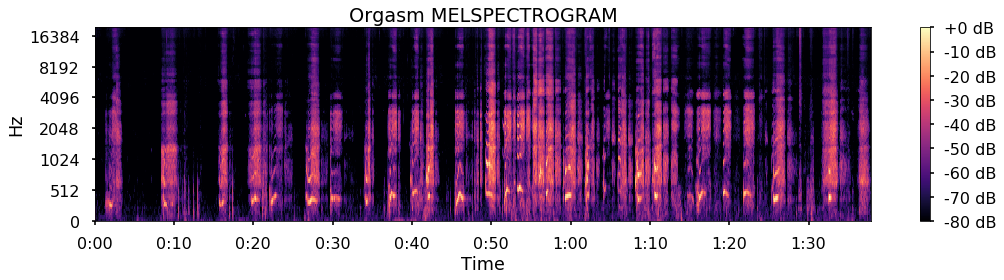

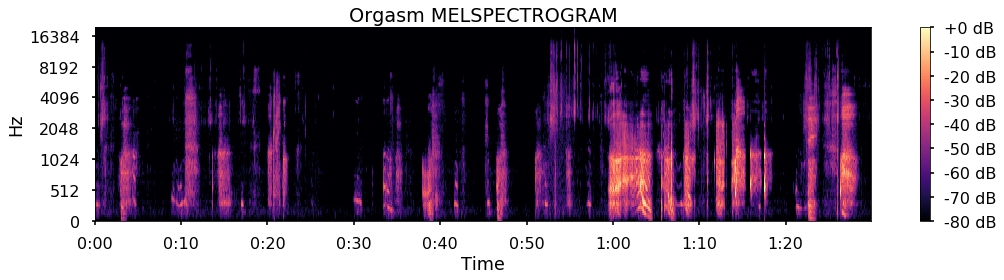

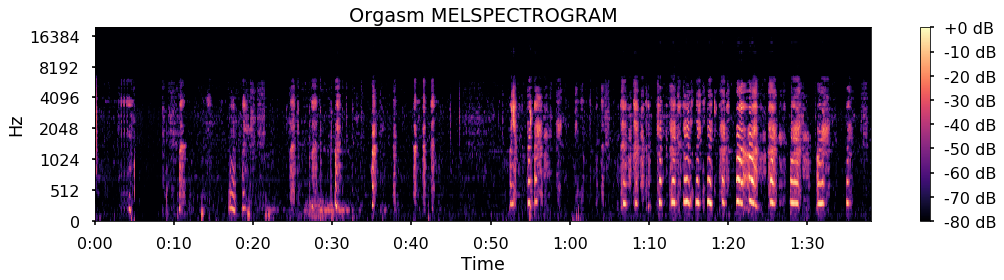

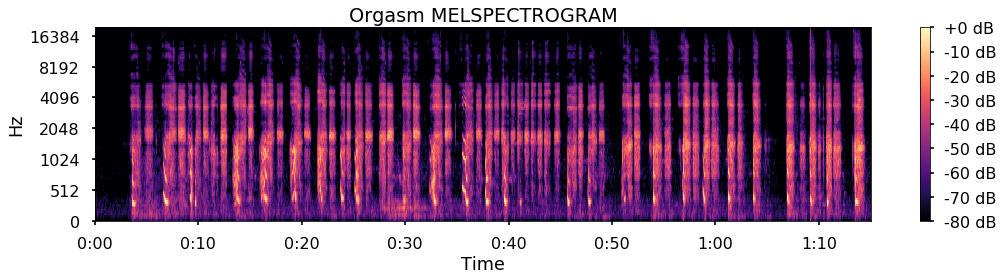

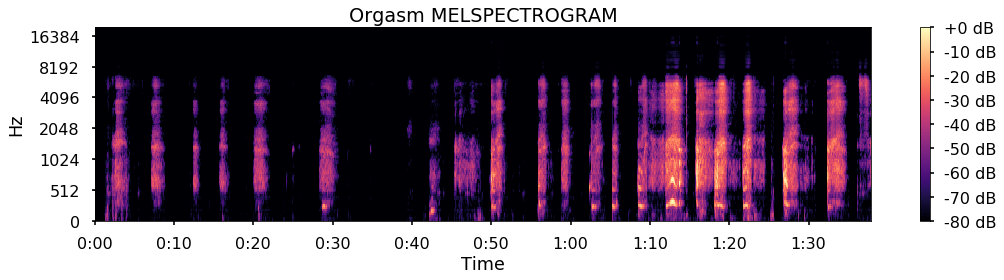

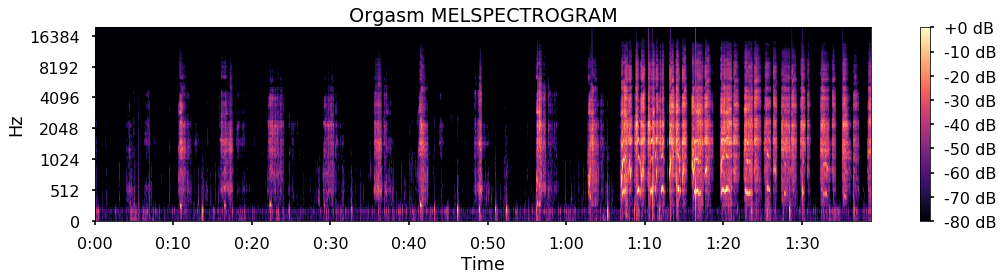

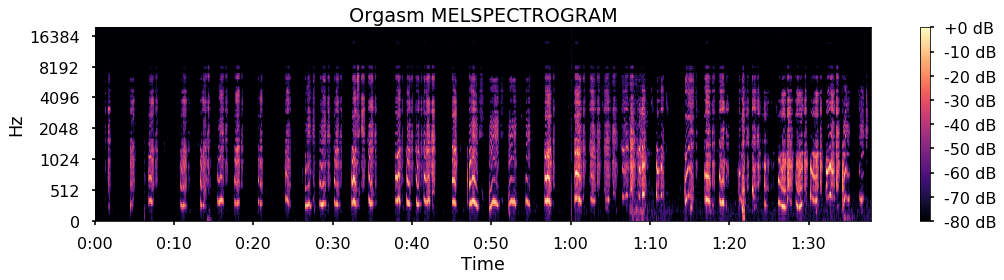

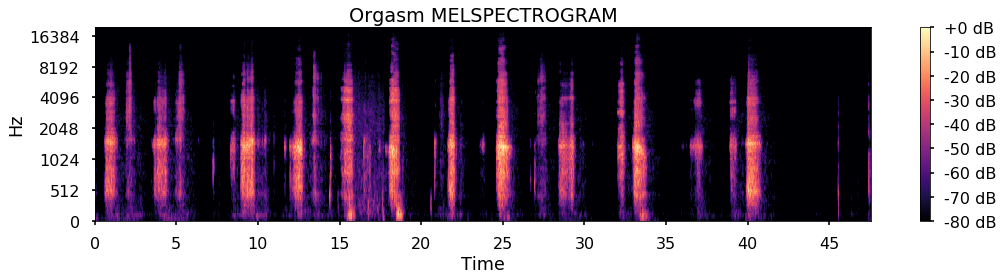

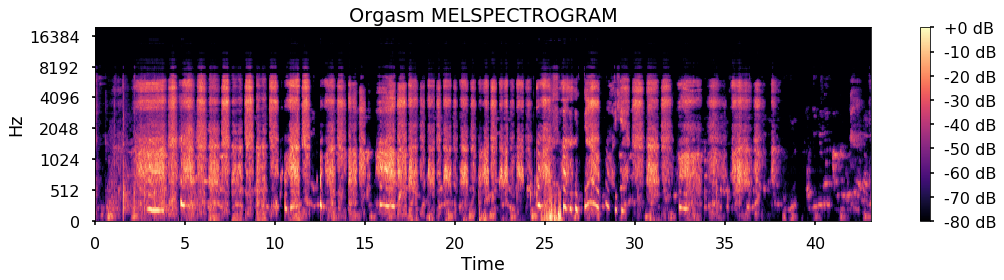

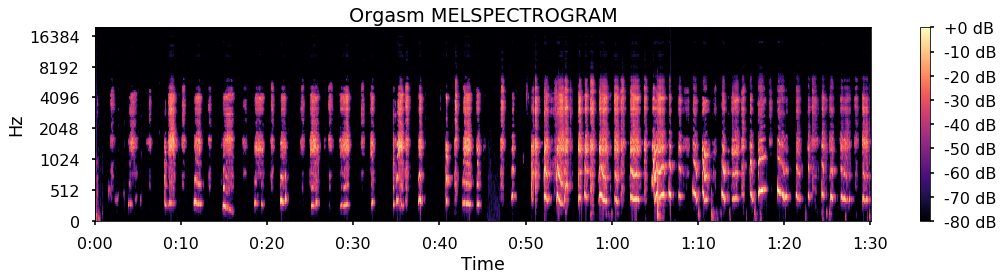

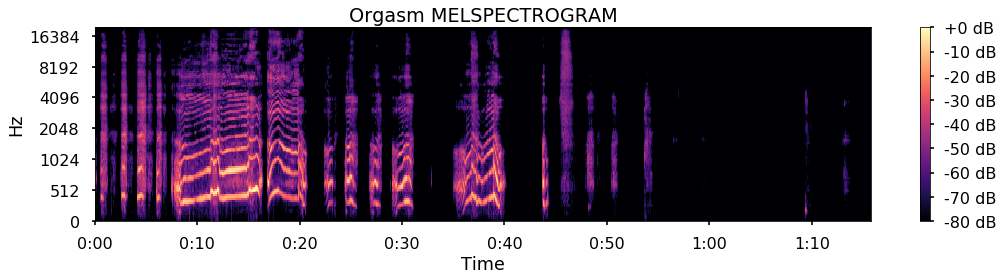

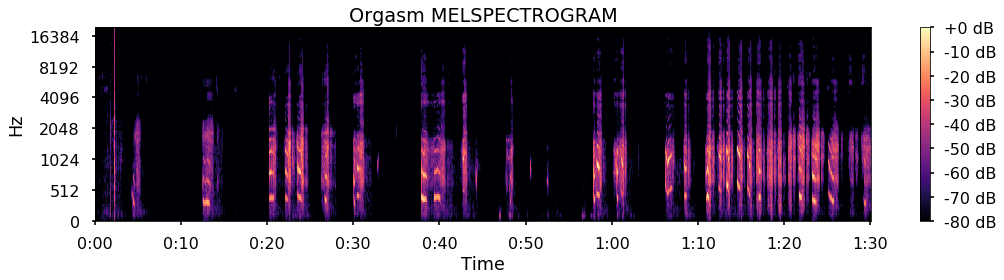

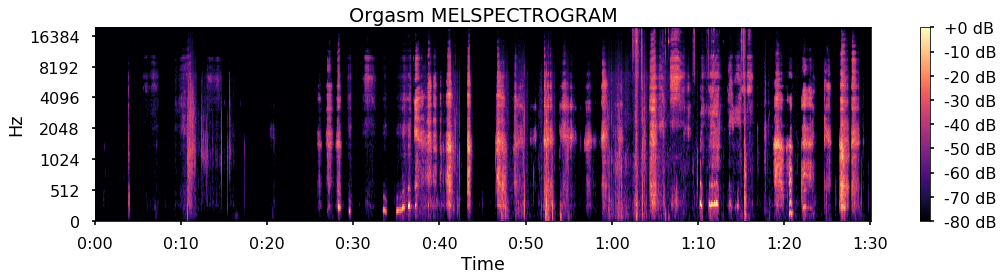

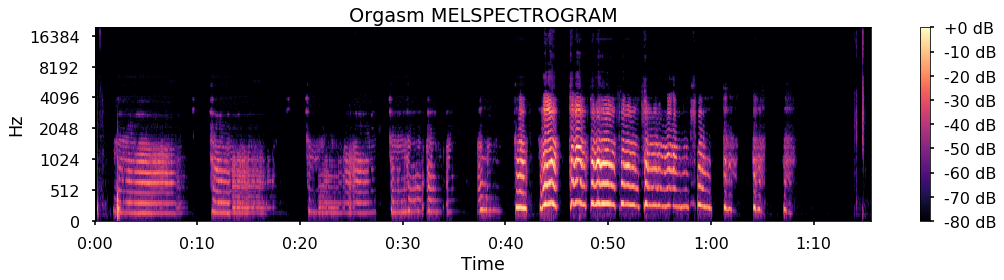

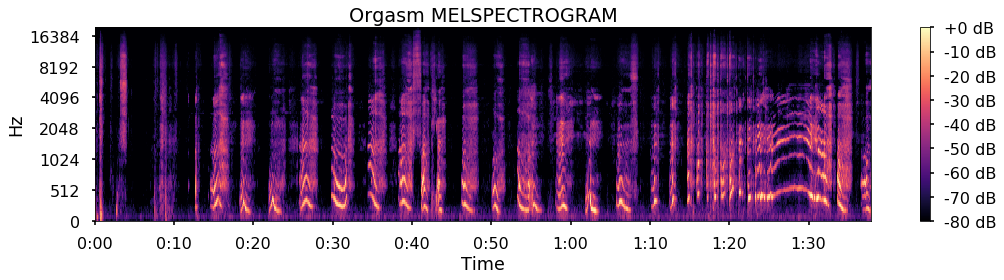

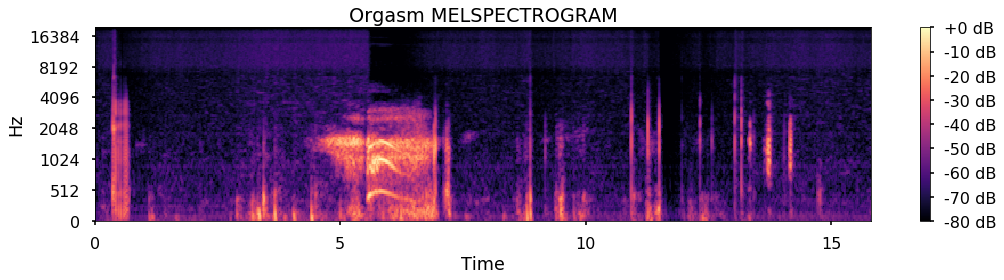

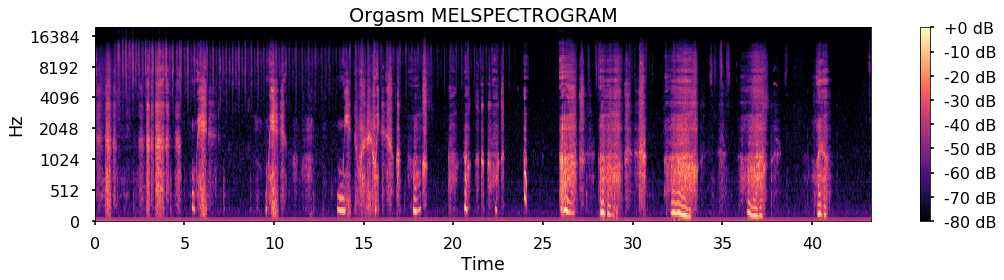

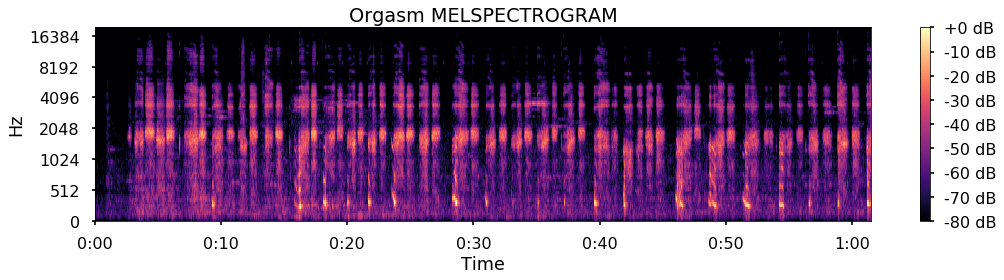

In [49]:
for item in wavaudioset:
    vismel(item)
    plt.show()

Waveform and stft

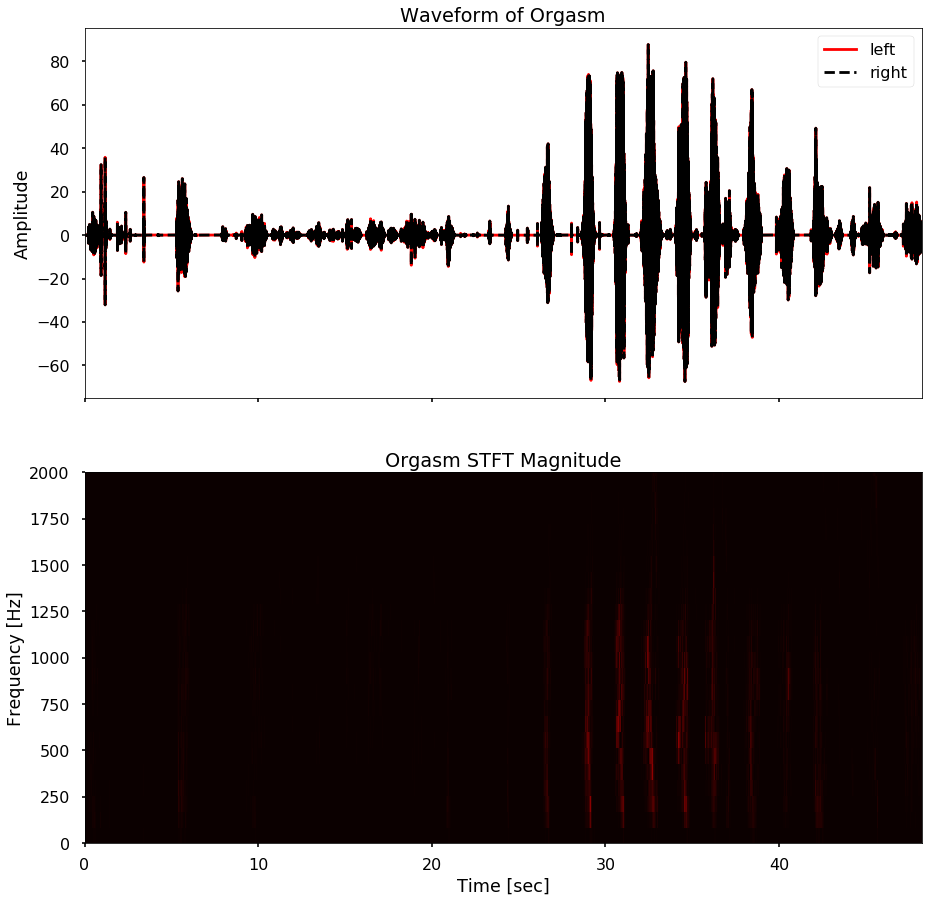

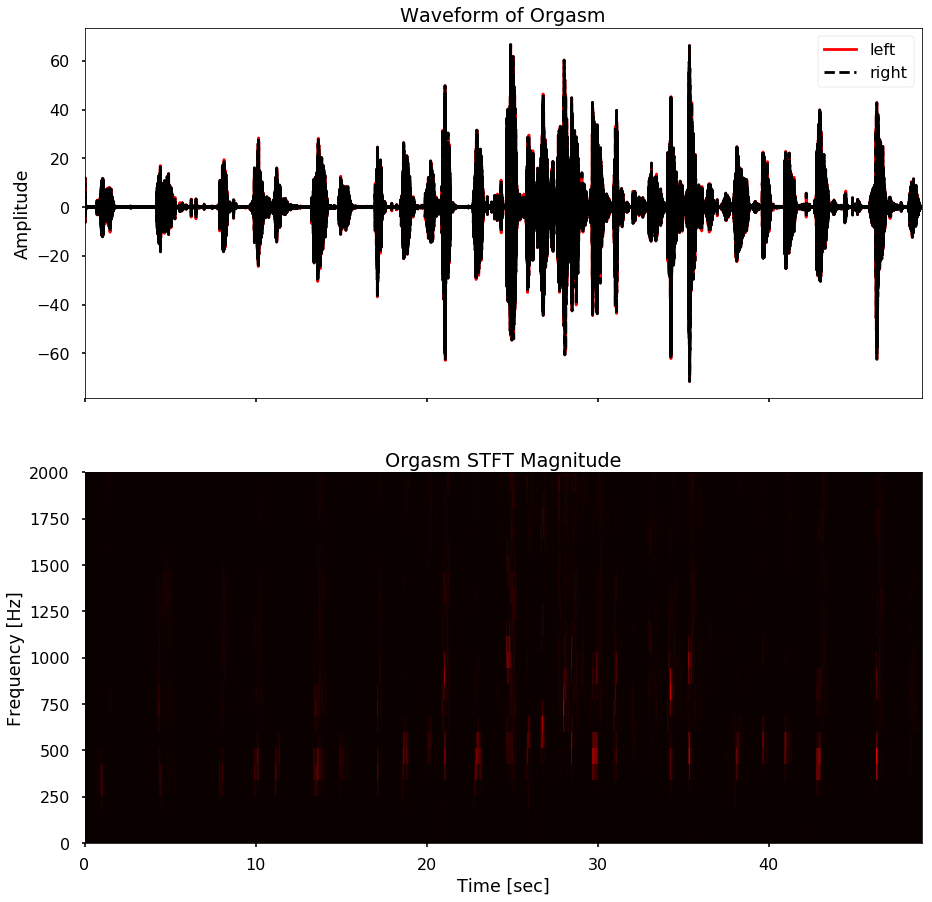

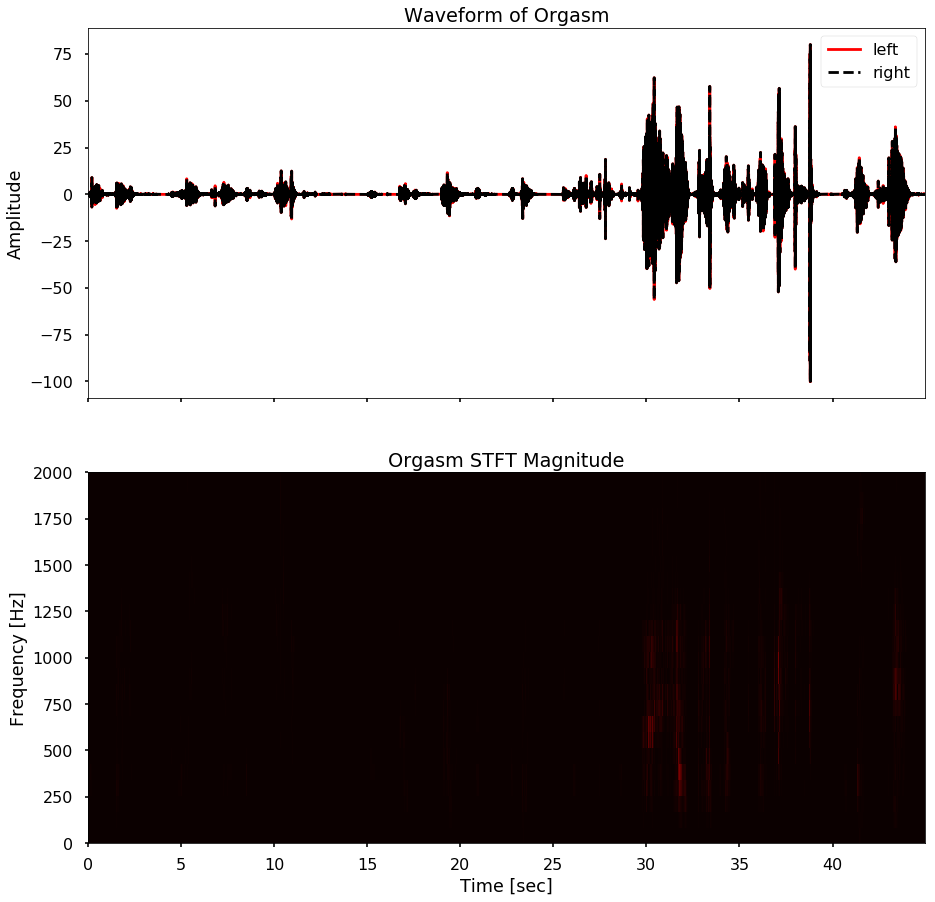

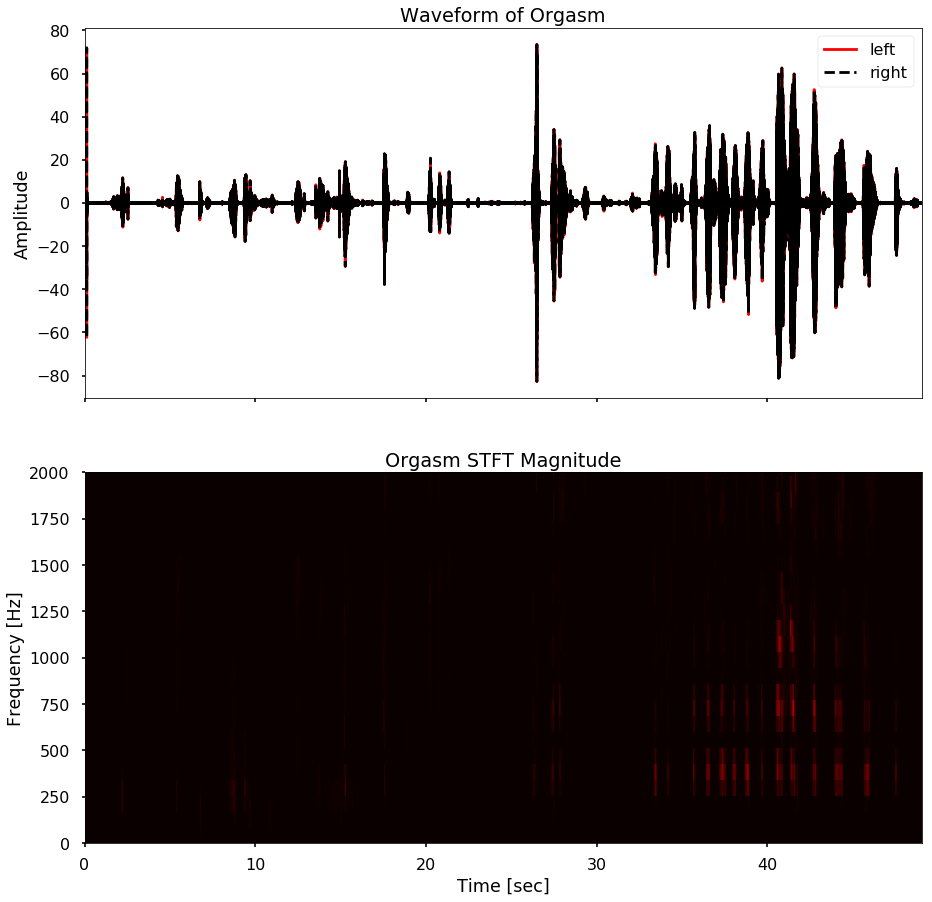

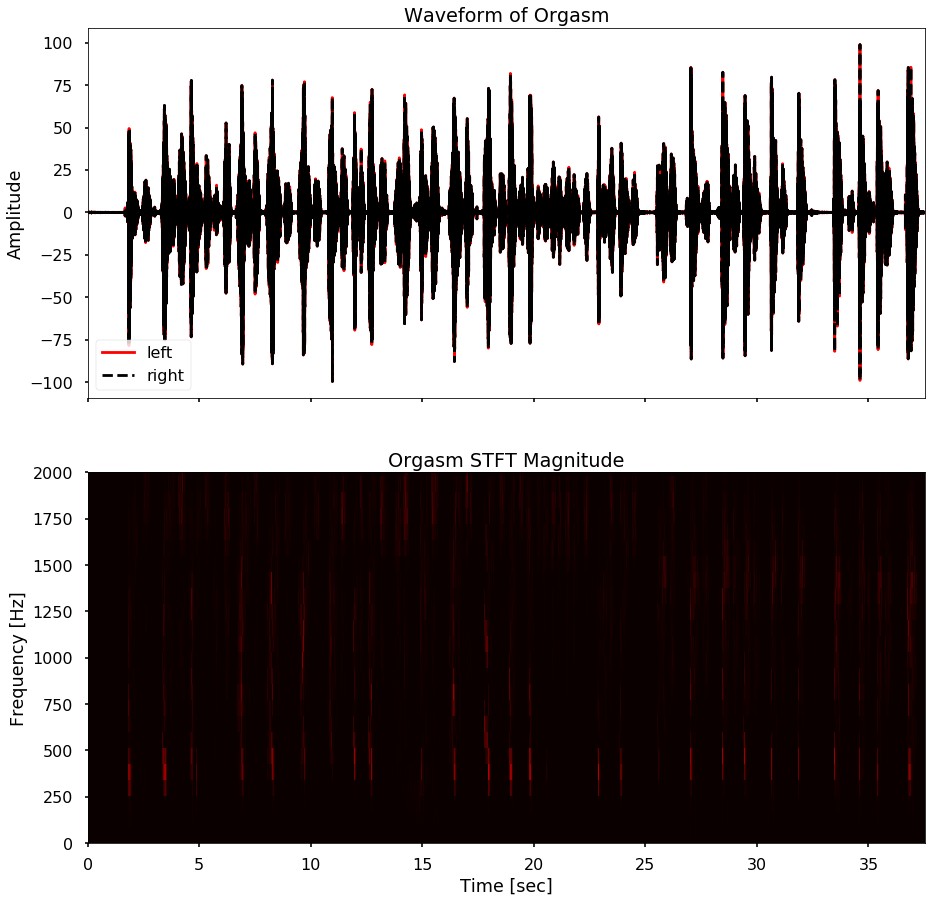

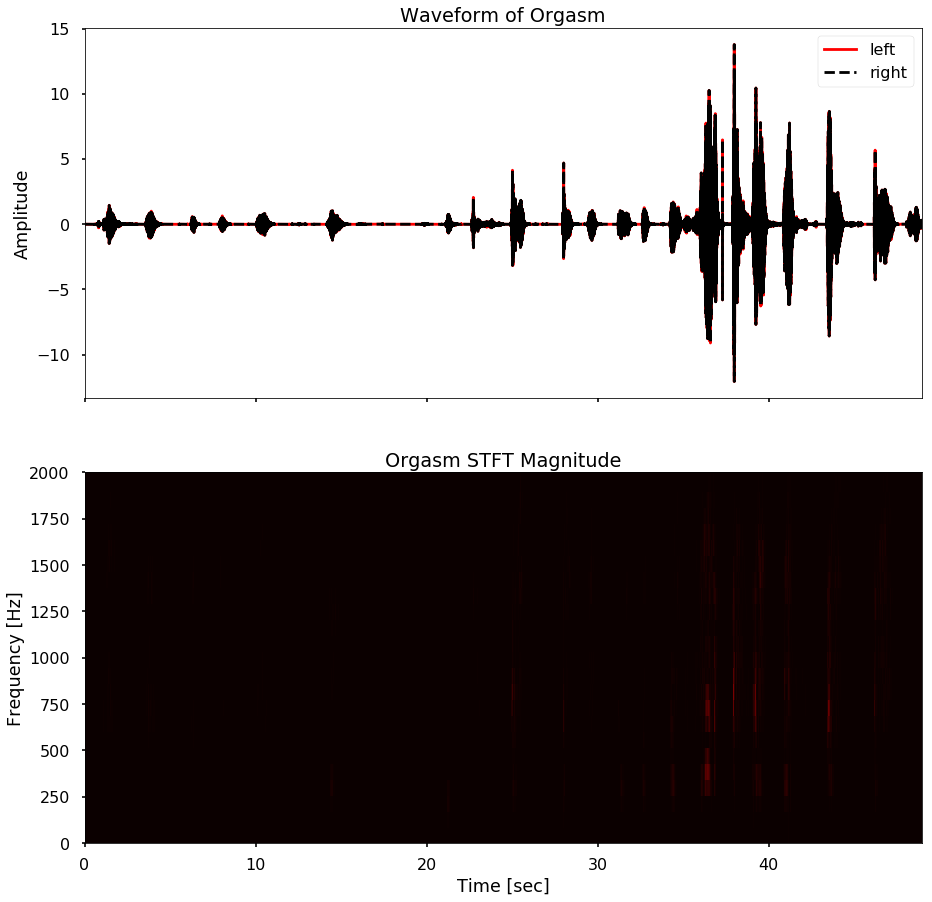

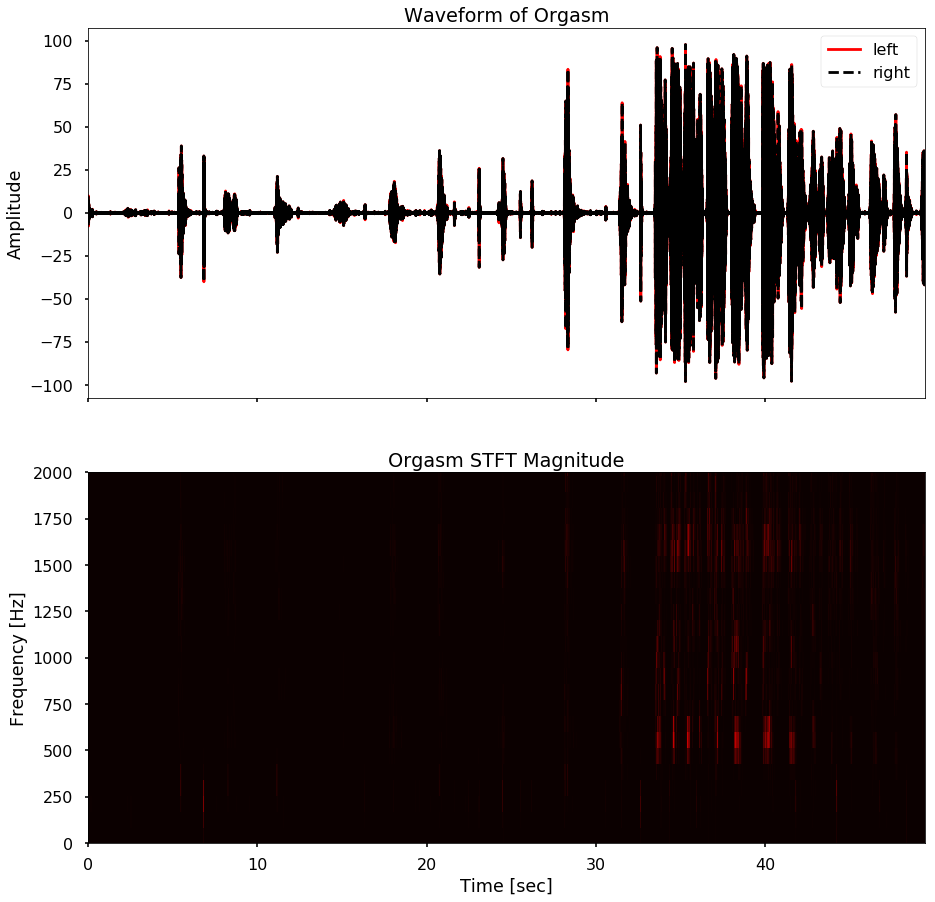

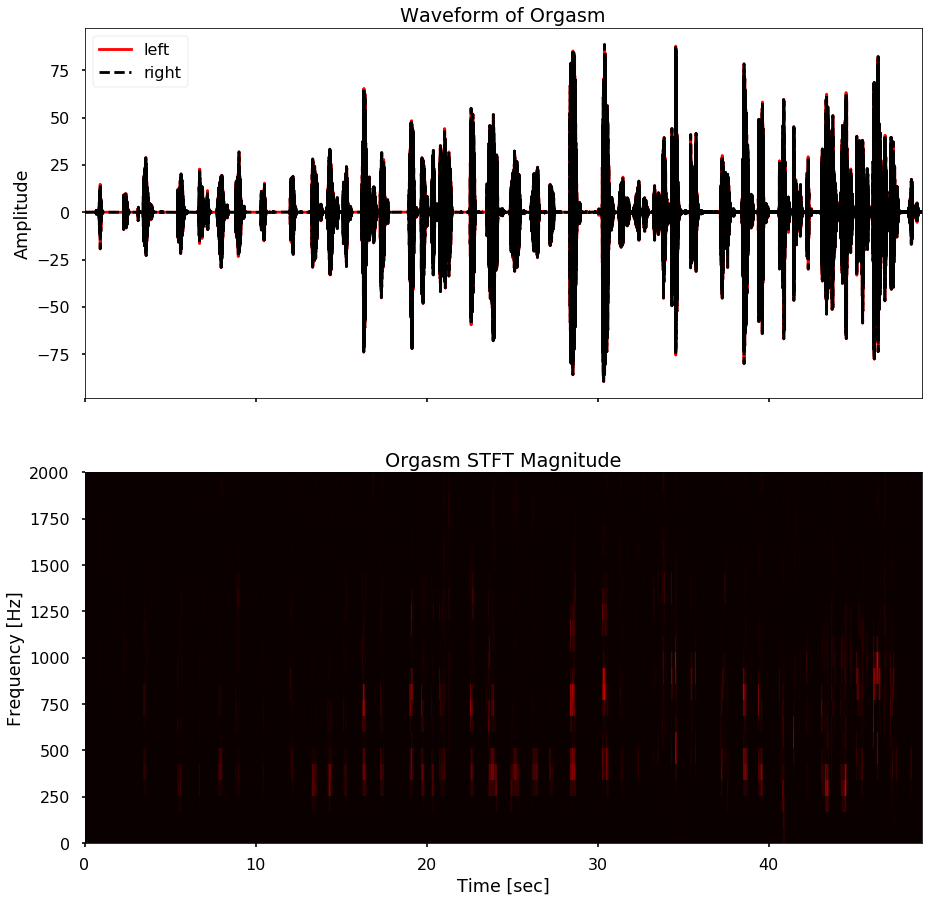

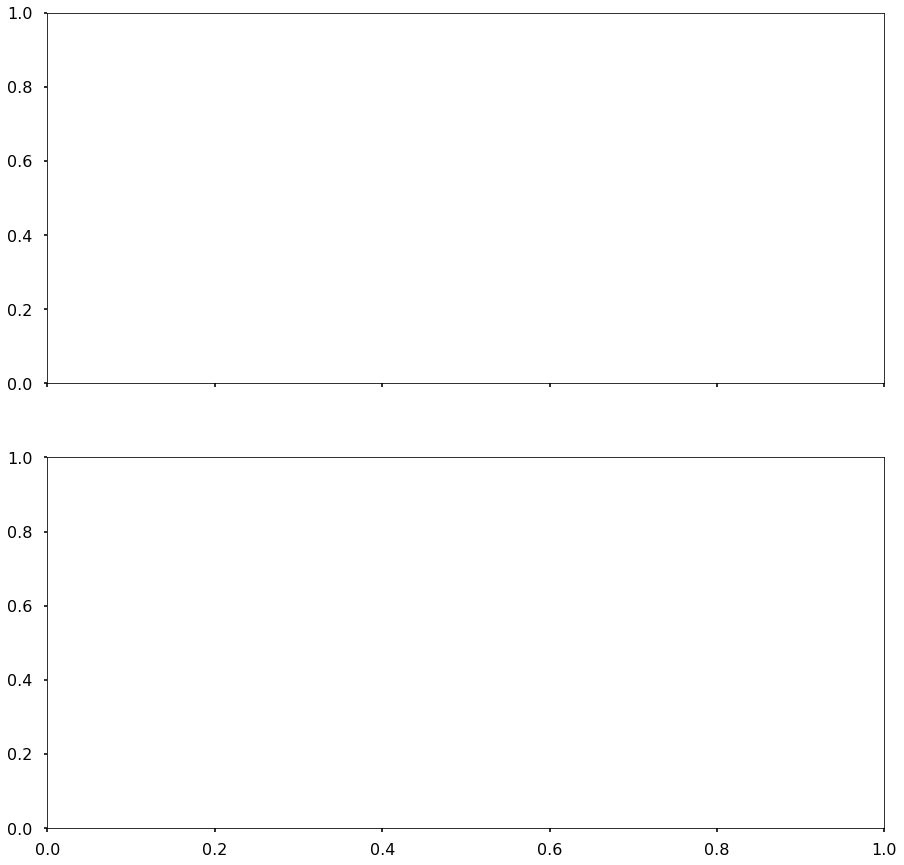

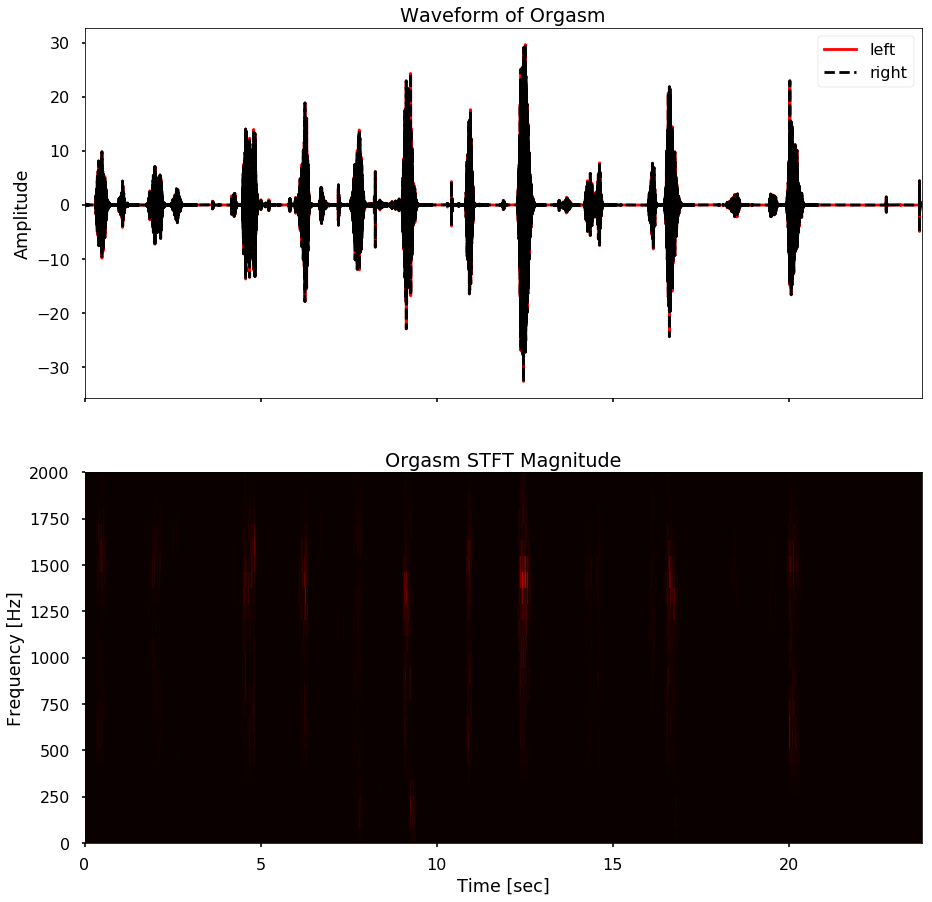

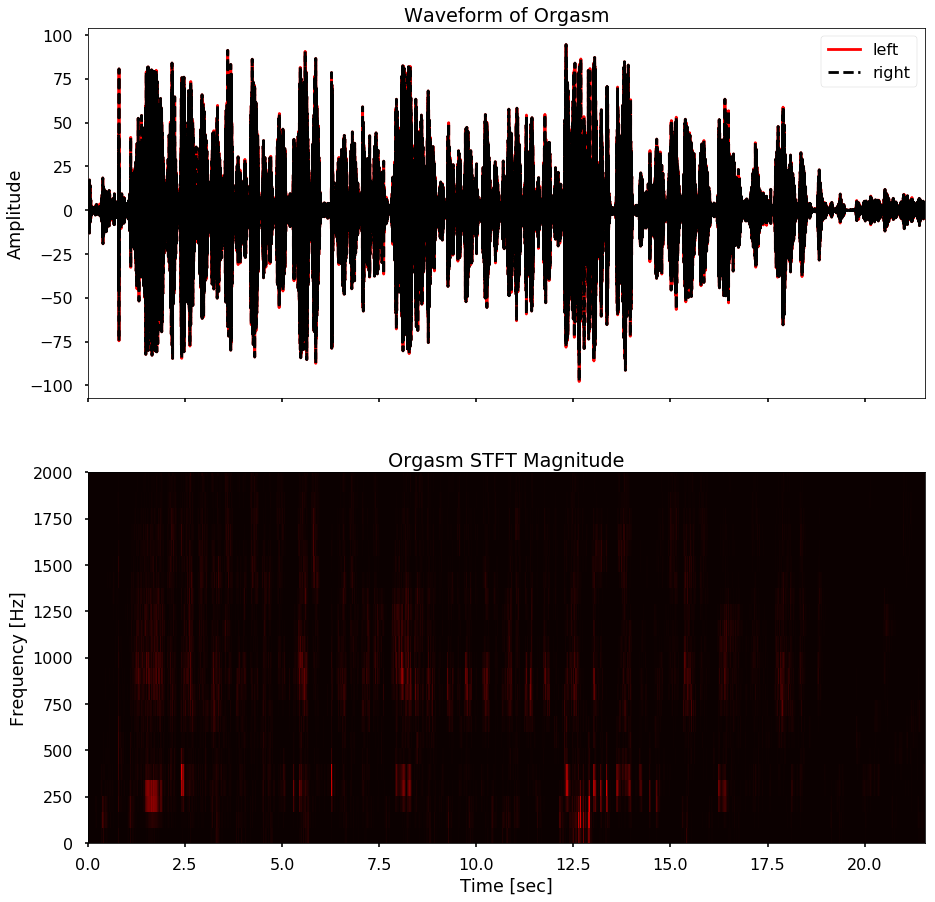

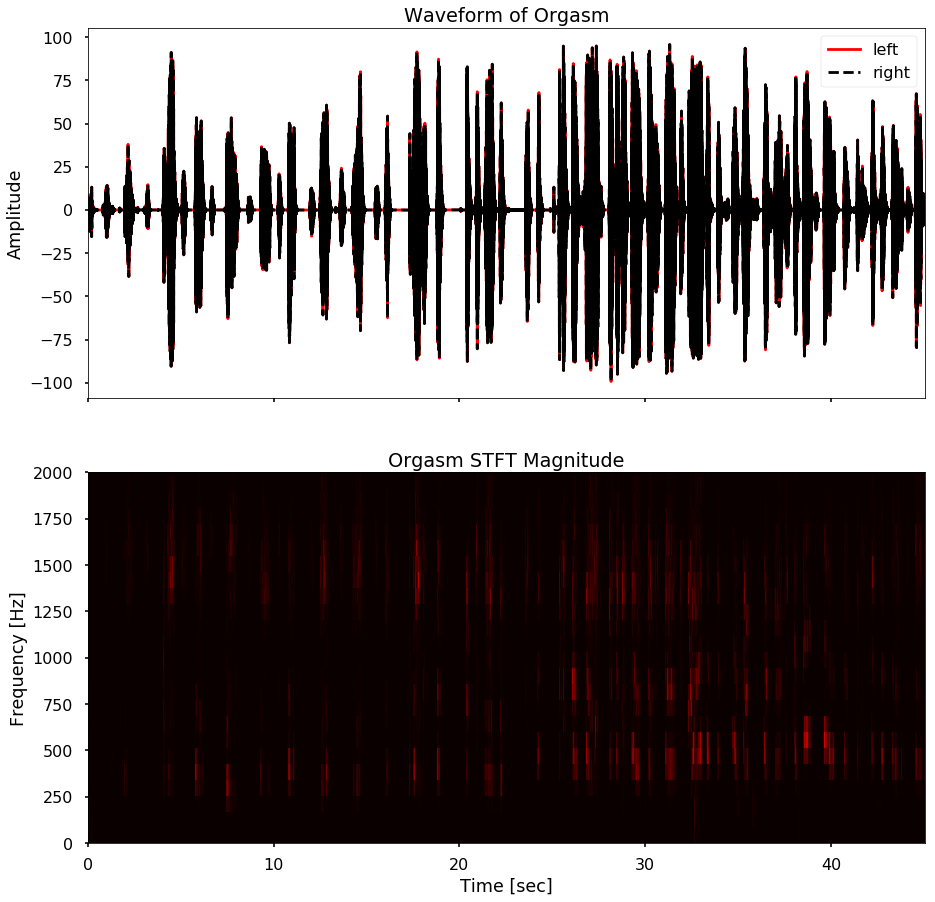

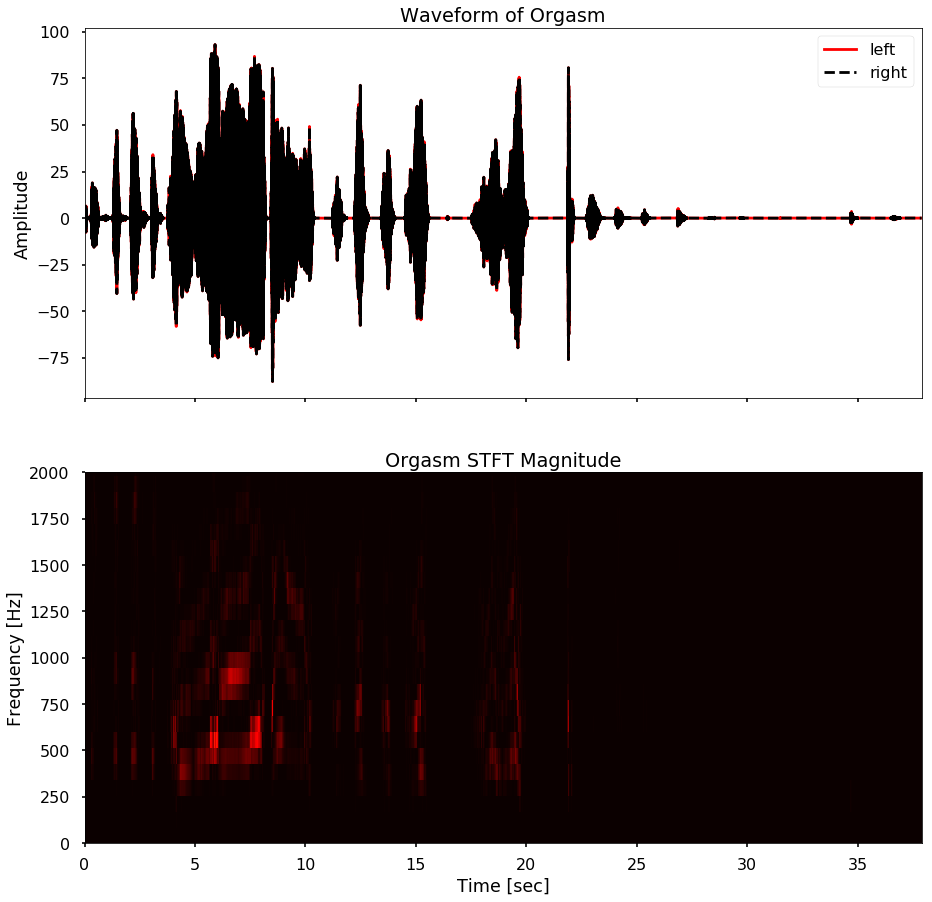

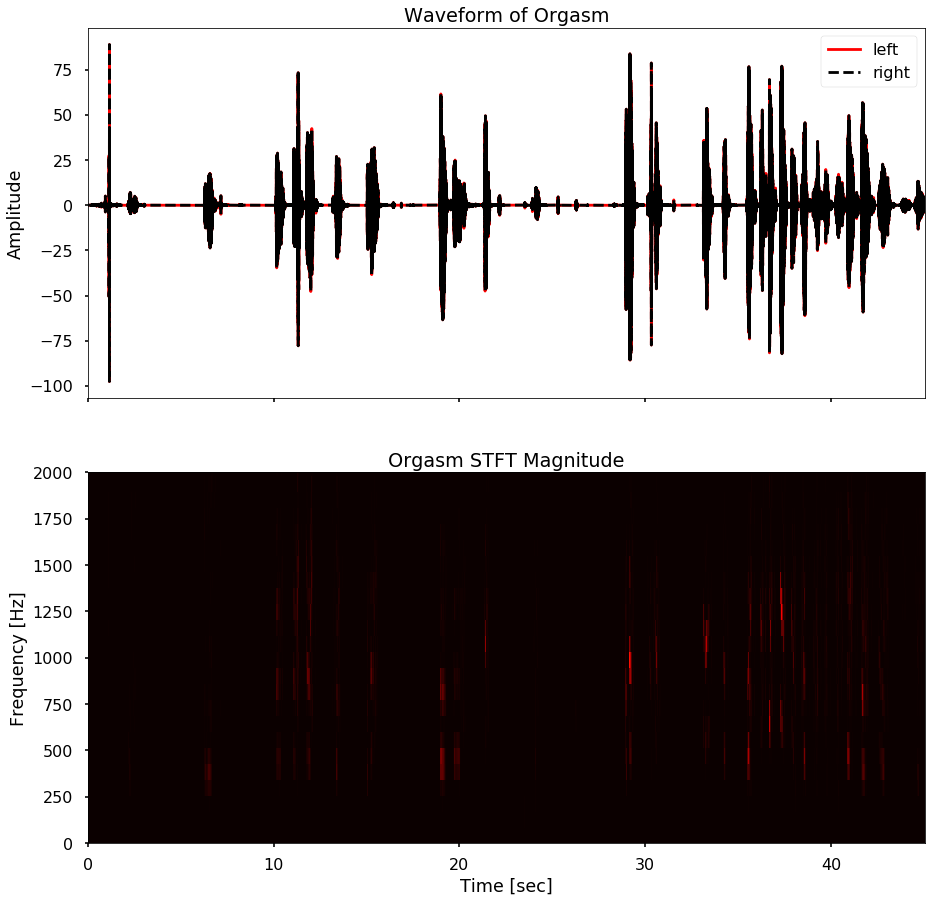

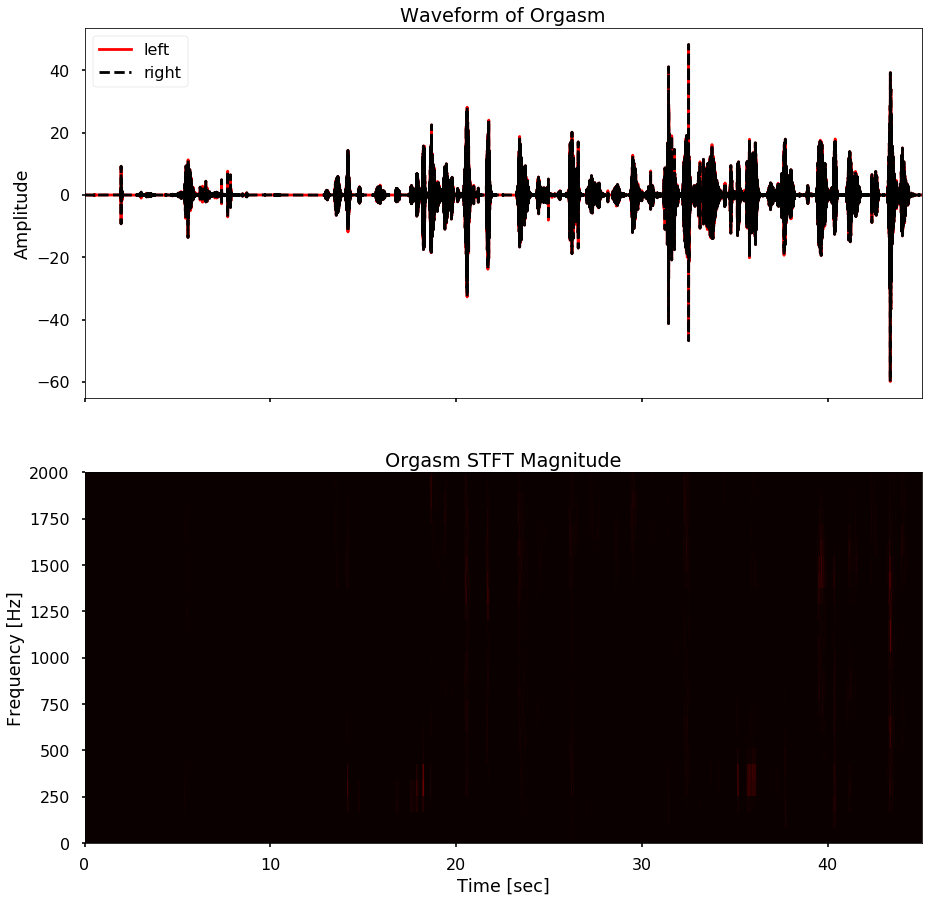

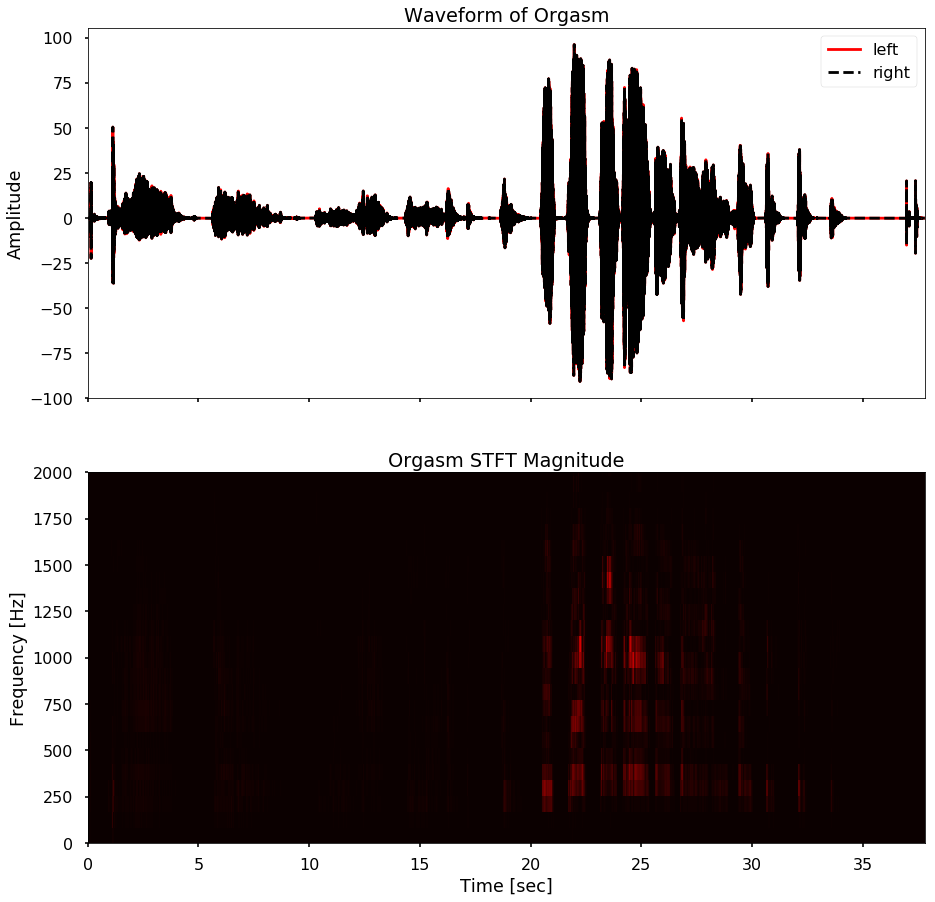

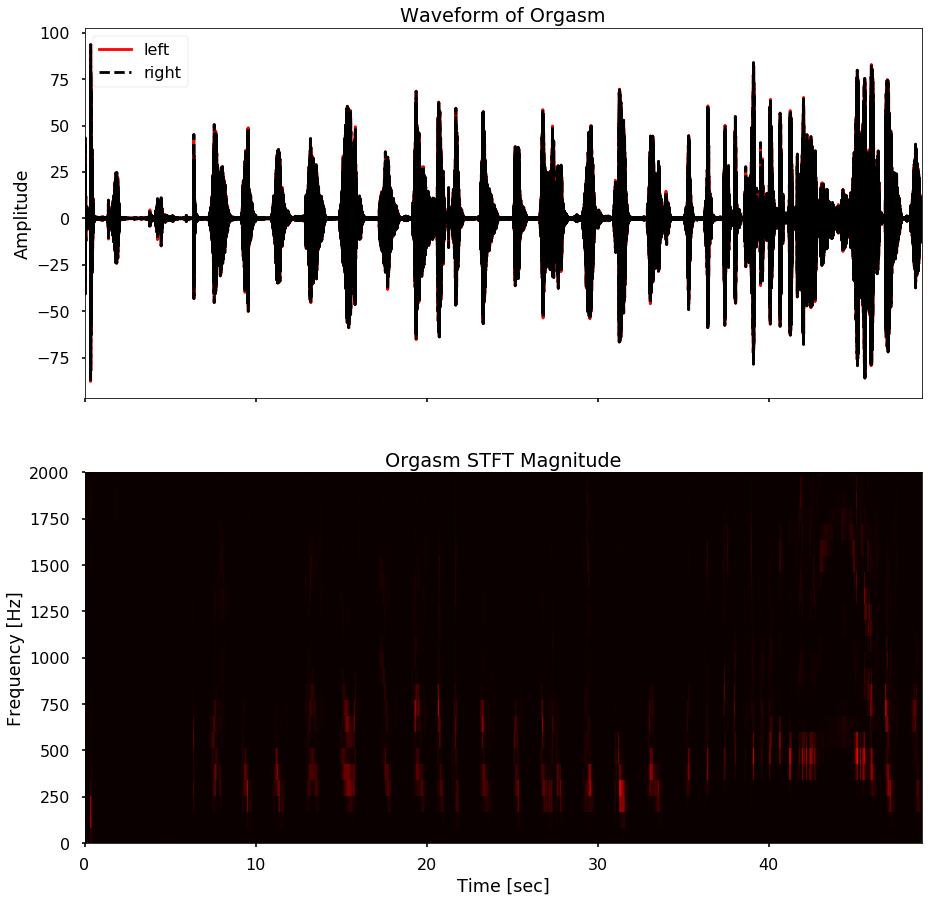

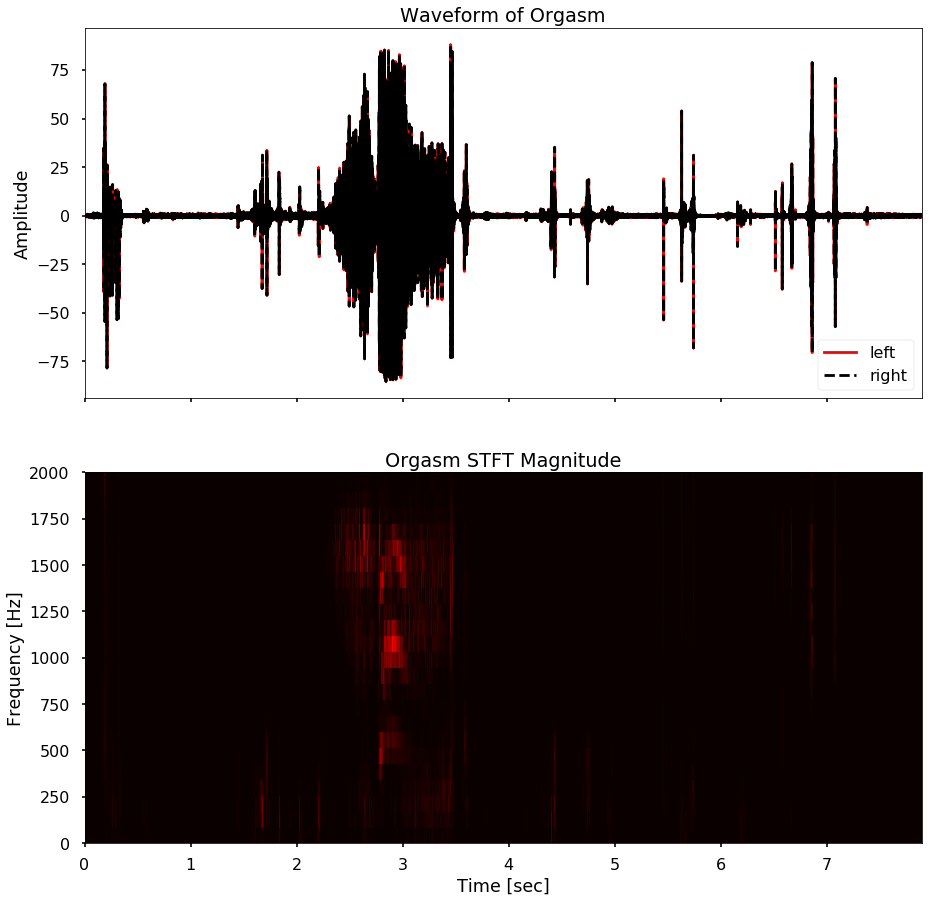

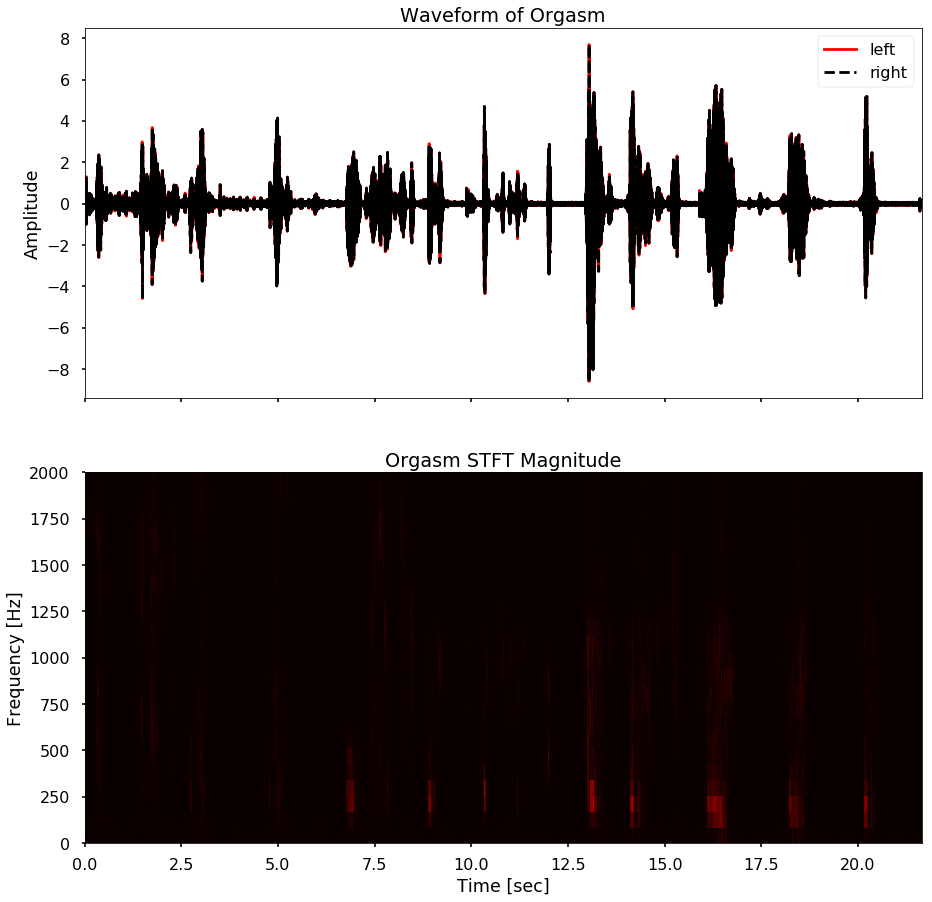

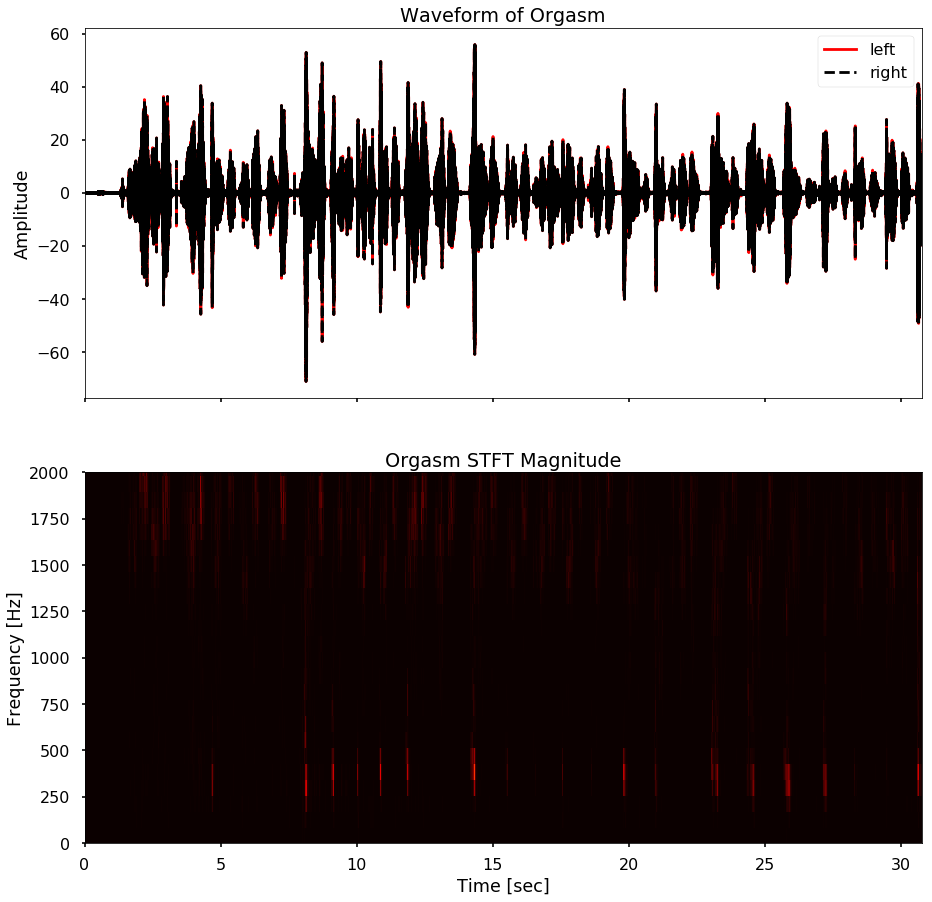

In [11]:
for item in wavaudioset:
    vis(item)
    plt.show()